<a href="https://colab.research.google.com/github/rahul2046/-IEEE-ML-PROJECT-I04/blob/main/MNIST_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import  Dense,Conv2D,MaxPooling2D,Flatten,Dropout
mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
from keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

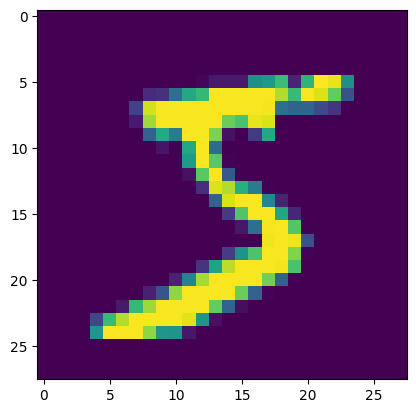

In [5]:
plt.imshow(x_train[0])

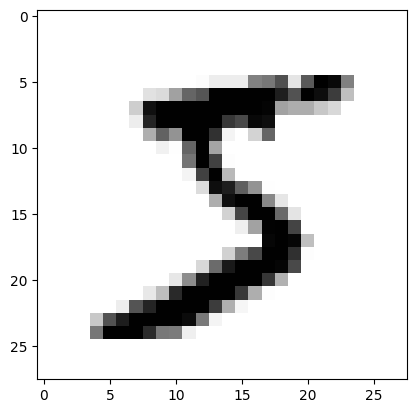

In [6]:
plt.imshow(x_train[0], cmap='binary')

In [7]:
def plot_input_img(i):
  plt.imshow(x_train[i],cmap ='binary')
  plt.title(y_train[i])
  plt.show()


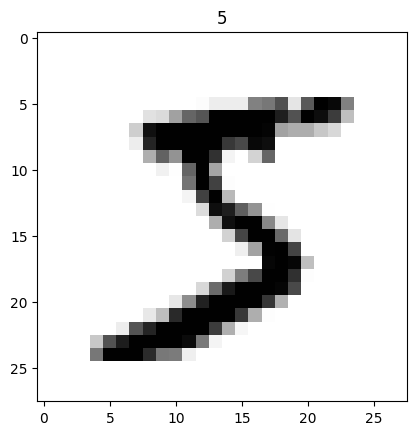

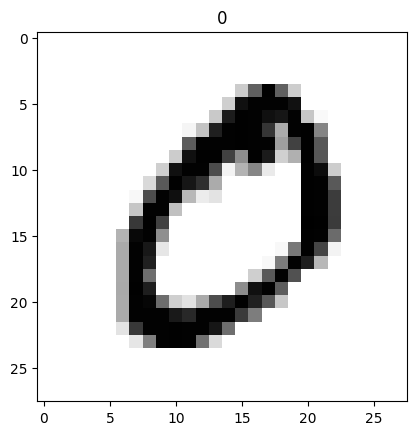

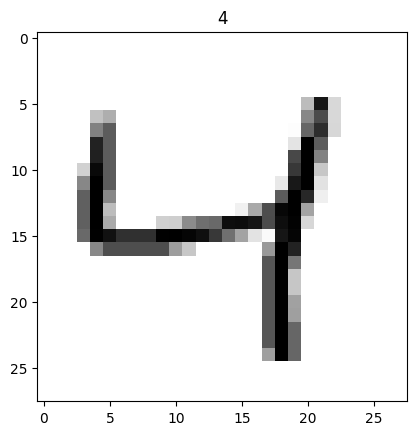

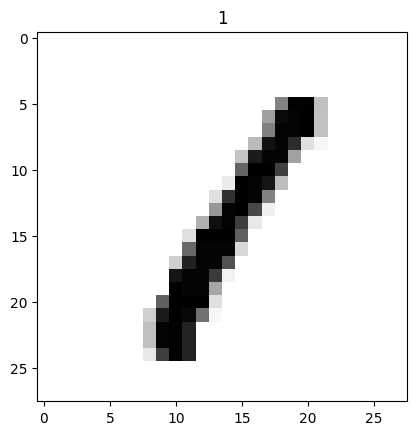

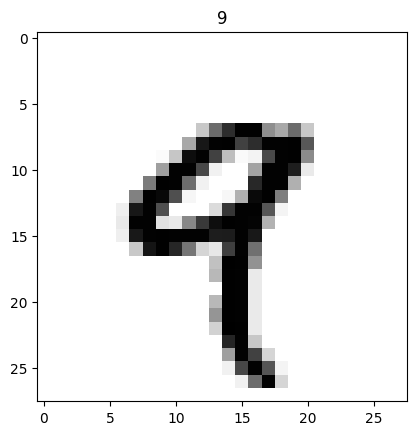

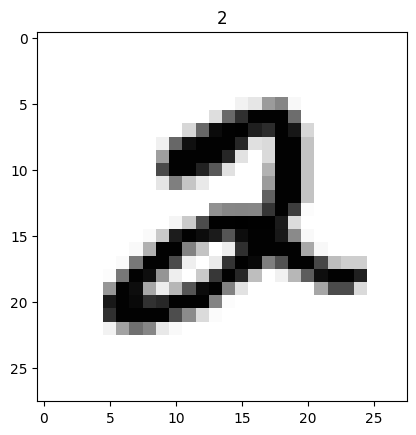

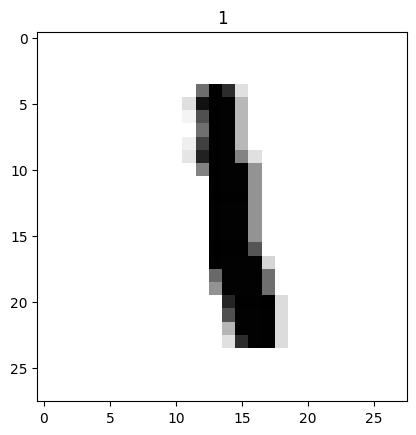

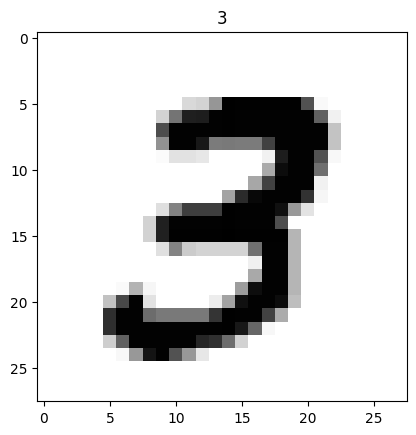

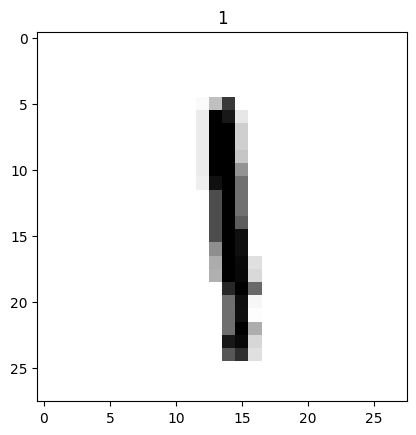

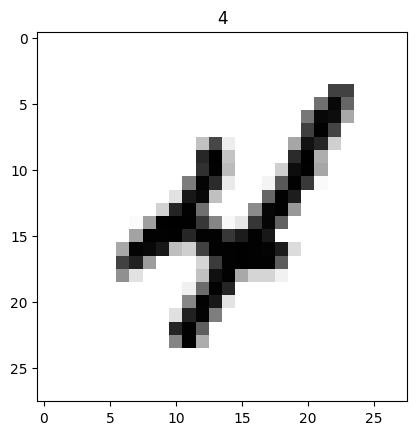

In [8]:
for i in range(10):
  plot_input_img(i)


In [9]:
x_train =x_train.astype(np.float32)/255
x_test =x_test.astype(np.float32)/255

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train =np.expand_dims(x_train,-1)
x_test =np.expand_dims(x_test,-1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))



In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [19]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_loss',min_delta=0.01,patience=4,verbose=1)
mc = ModelCheckpoint('./bestmodel.h5',monitor='val_acc',verbose=1,save_best_only=True)
cb = [es,mc]

In [ ]:
his = model.fit(x_train,y_train,epochs=20,validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 43s 32ms/step - loss: 0.2158 - accuracy: 0.9331 - val_loss: 0.0812 - val_accuracy: 0.9743
Epoch 2/20
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0765 - accuracy: 0.9765 - val_loss: 0.0633 - val_accuracy: 0.9804
Epoch 3/20
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0596 - accuracy: 0.9819 - val_loss: 0.0547 - val_accuracy: 0.9829
Epoch 4/20
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0479 - val_accuracy: 0.9859
Epoch 5/20
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0418 - val_accuracy: 0.9874
Epoch 6/20
1313/1313 [==============================] - 41s 32ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0437 - val_accuracy: 0.9867
Epoch 7/20
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0300 - accuracy: 0.9898 - val_loss: 0.0403 -

In [ ]:
mc = ModelCheckpoint('path/to/your/directory/bestmodel.h5',monitor='val_accuracy',verbose=1,save_best_only=True)

In [31]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Directory where you want to save the model
save_dir = 'path/to/your/directory'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define the full path to the model file
model_path = os.path.join(save_dir, 'bestmodel.h5')

# Update the ModelCheckpoint callback with the correct path
mc = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss',min_delta=0.01,patience=4,verbose=1)
cb = [es,mc]

# ... (rest of your model training code)

# Fit the model (make sure to include the callbacks)
his = model.fit(x_train, y_train, epochs=20, validation_split=0.3, callbacks=cb)

# Load the saved model
model_S = keras.models.load_model(model_path)

Epoch 1/20
1313/1313 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.9969
Epoch 1: val_accuracy improved from -inf to 0.98933, saving model to path/to/your/directory/bestmodel.h5
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0466 - val_accuracy: 0.9893
Epoch 2/20
   6/1313 [..............................] - ETA: 32s - loss: 0.0112 - accuracy: 0.9948

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1312/1313 [============================>.] - ETA: 0s - loss: 0.0099 - accuracy: 0.9966
Epoch 2: val_accuracy did not improve from 0.98933
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0527 - val_accuracy: 0.9882
Epoch 3/20
1312/1313 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9971
Epoch 3: val_accuracy did not improve from 0.98933
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0483 - val_accuracy: 0.9893
Epoch 4/20
1312/1313 [============================>.] - ETA: 0s - loss: 0.0093 - accuracy: 0.9967
Epoch 4: val_accuracy improved from 0.98933 to 0.98972, saving model to path/to/your/directory/bestmodel.h5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.0470 - val_accuracy: 0.9897
Epoch 5/20
1313/1313 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9971
Epoc

In [ ]:
from keras.models import save_model

# Assuming 'model' is your trained Keras model
model.save('my_model.h5')



